In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [13]:
df_test0 = pd.read_feather('../data/test_train_split/test_0.feather')
df_test1 = pd.read_feather('../data/test_train_split/test_1.feather')
df_test2 = pd.read_feather('../data/test_train_split/test_2.feather')
df_test3 = pd.read_feather('../data/test_train_split/test_3.feather')

df_train0 = pd.read_feather('../data/test_train_split/train_0.feather')
df_train1 = pd.read_feather('../data/test_train_split/train_1.feather')
df_train2 = pd.read_feather('../data/test_train_split/train_2.feather')
df_train3 = pd.read_feather('../data/test_train_split/train_3.feather')

df = pd.read_feather('../data/clean/CleanedData.feather')

In [15]:
df.head()

,LCLid,Date,KWH,volume weighted price,index,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
0,MAC000002,2012-10-12,7.098,42.99,12338,5.0,6.4,106.0,13.5,12.3,9.7,0.0,100580.0,0.0
1,MAC000003,2012-10-12,13.434,42.99,12338,5.0,6.4,106.0,13.5,12.3,9.7,0.0,100580.0,0.0
2,MAC000004,2012-10-12,1.522,42.99,12338,5.0,6.4,106.0,13.5,12.3,9.7,0.0,100580.0,0.0
3,MAC000005,2012-10-12,4.448,42.99,12338,5.0,6.4,106.0,13.5,12.3,9.7,0.0,100580.0,0.0
4,MAC000006,2012-10-12,4.074,42.99,12338,5.0,6.4,106.0,13.5,12.3,9.7,0.0,100580.0,0.0


Root Mean Squared Error (RMSE): 8.75309902943254
Mean Squared Error: 76.61674261905289
R-squared: 0.028087330918842746


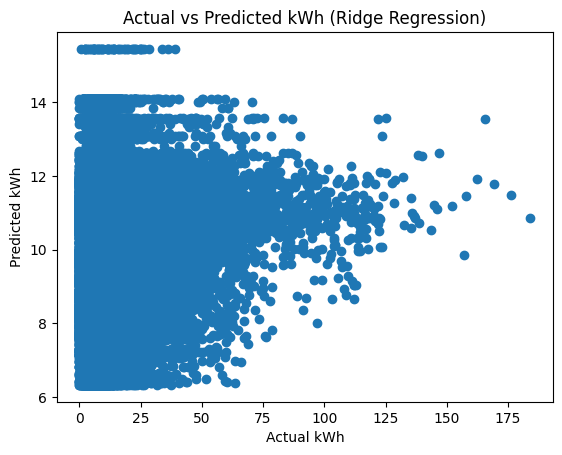

In [18]:

X = df.drop(['KWH', 'LCLid', 'Date'], axis=1)  # Features
y = df['KWH']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build a Ridge Regression model
alpha = 1.0 
ridge_model = Ridge(alpha=alpha)
ridge_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = ridge_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f'Root Mean Squared Error (RMSE): {rmse}')

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# Plot actual vs predicted values
plt.scatter(y_test, y_pred)
plt.xlabel('Actual kWh')
plt.ylabel('Predicted kWh')
plt.title('Actual vs Predicted kWh (Ridge Regression)')
plt.show()